<a href="https://colab.research.google.com/github/iljimae13/FaceRecognition/blob/main/Dlib_face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# install deepface
!pip install deepface

In [11]:
# import all dependencies
from deepface import DeepFace
import matplotlib.pyplot as plt
import os
from os import listdir
import numpy as np

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# setting configuration
backends = ['opencv', 'ssd', 'dlib', 'mtcnn', 'retinaface', 'mediapipe']
metrics = ["cosine", "euclidean", "euclidean_l2"]
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib"]
BACKEND = 4
MODEL = 7
METRIC = 0

# the path/directory of dataset
test_folder_dir = "/content/drive/MyDrive/Program/deepfacetask/images/test"
ref_folder_dir = "/content/drive/MyDrive/Program/deepfacetask/images/referensi"

In [14]:
# load test images & find similar images from ref images 
imgs = []
img_paths = []
results = []
valid_images = [".jpg",".jpeg",".png",".jfif"]
for images in os.listdir(test_folder_dir):
  ext = os.path.splitext(images.lower())[1]
  if ext.lower() not in valid_images:
    continue
  print('image = '+images)
  # save img path to array
  img_path = test_folder_dir+"/"+images
  img_paths.append(img_path)
  # save image to array
  img = DeepFace.detectFace(img_path = img_path, detector_backend = backends[BACKEND], 
                            enforce_detection = False, align = True)
  imgs.append(img)
  # face verification
  result = DeepFace.find(img_path = img_path, db_path = ref_folder_dir, model_name = models[MODEL], 
                         detector_backend = backends[BACKEND], distance_metric = metrics[METRIC], 
                         enforce_detection = False, align = True)
  # save result to array
  results.append(result)

# array length
print('image path array length = '+str(len(np.array(img_paths))))
print('image array length = '+str(len(np.array(imgs))))
print('result array length = '+str(len(np.array(results))))
results[0]

image = leni-fitriani2.png
There are  21  representations found in  representations_dlib.pkl
find function lasts  0.18931293487548828  seconds
image = unknown-lena.jpeg
There are  21  representations found in  representations_dlib.pkl
find function lasts  0.12523555755615234  seconds
image = unknown-ridwan-kamil.jpg
There are  21  representations found in  representations_dlib.pkl
find function lasts  0.20204758644104004  seconds
image = handoko-supeno3.jpg
There are  21  representations found in  representations_dlib.pkl
find function lasts  0.16193604469299316  seconds
image = unknown-junaedi.png
There are  21  representations found in  representations_dlib.pkl
find function lasts  0.20029282569885254  seconds
image = imam-ekowicaksono3.jpg
There are  21  representations found in  representations_dlib.pkl
find function lasts  0.1381065845489502  seconds
image = dewi-tresnawati2.jpg
There are  21  representations found in  representations_dlib.pkl
find function lasts  0.17806196212768

,identity,Dlib_cosine
0,/content/drive/MyDrive/Program/deepfacetask/im...,0.049376
1,/content/drive/MyDrive/Program/deepfacetask/im...,0.067537


In [15]:
# create side by side for image show
side_imgs = []
side_paths = []
for i in range(len(img_paths)):
  side_imgs.append(imgs[i])
  side_paths.append(img_paths[i])
  res_img_path = "null"
  img = "null"
  if len(np.array(results[i]))>0:
    res_img_path = np.array(results[i])[0][0]
    img = DeepFace.detectFace(img_path = res_img_path, 
                              detector_backend = backends[BACKEND], 
                              enforce_detection = False, align = True)
  side_imgs.append(img)
  side_paths.append(res_img_path)

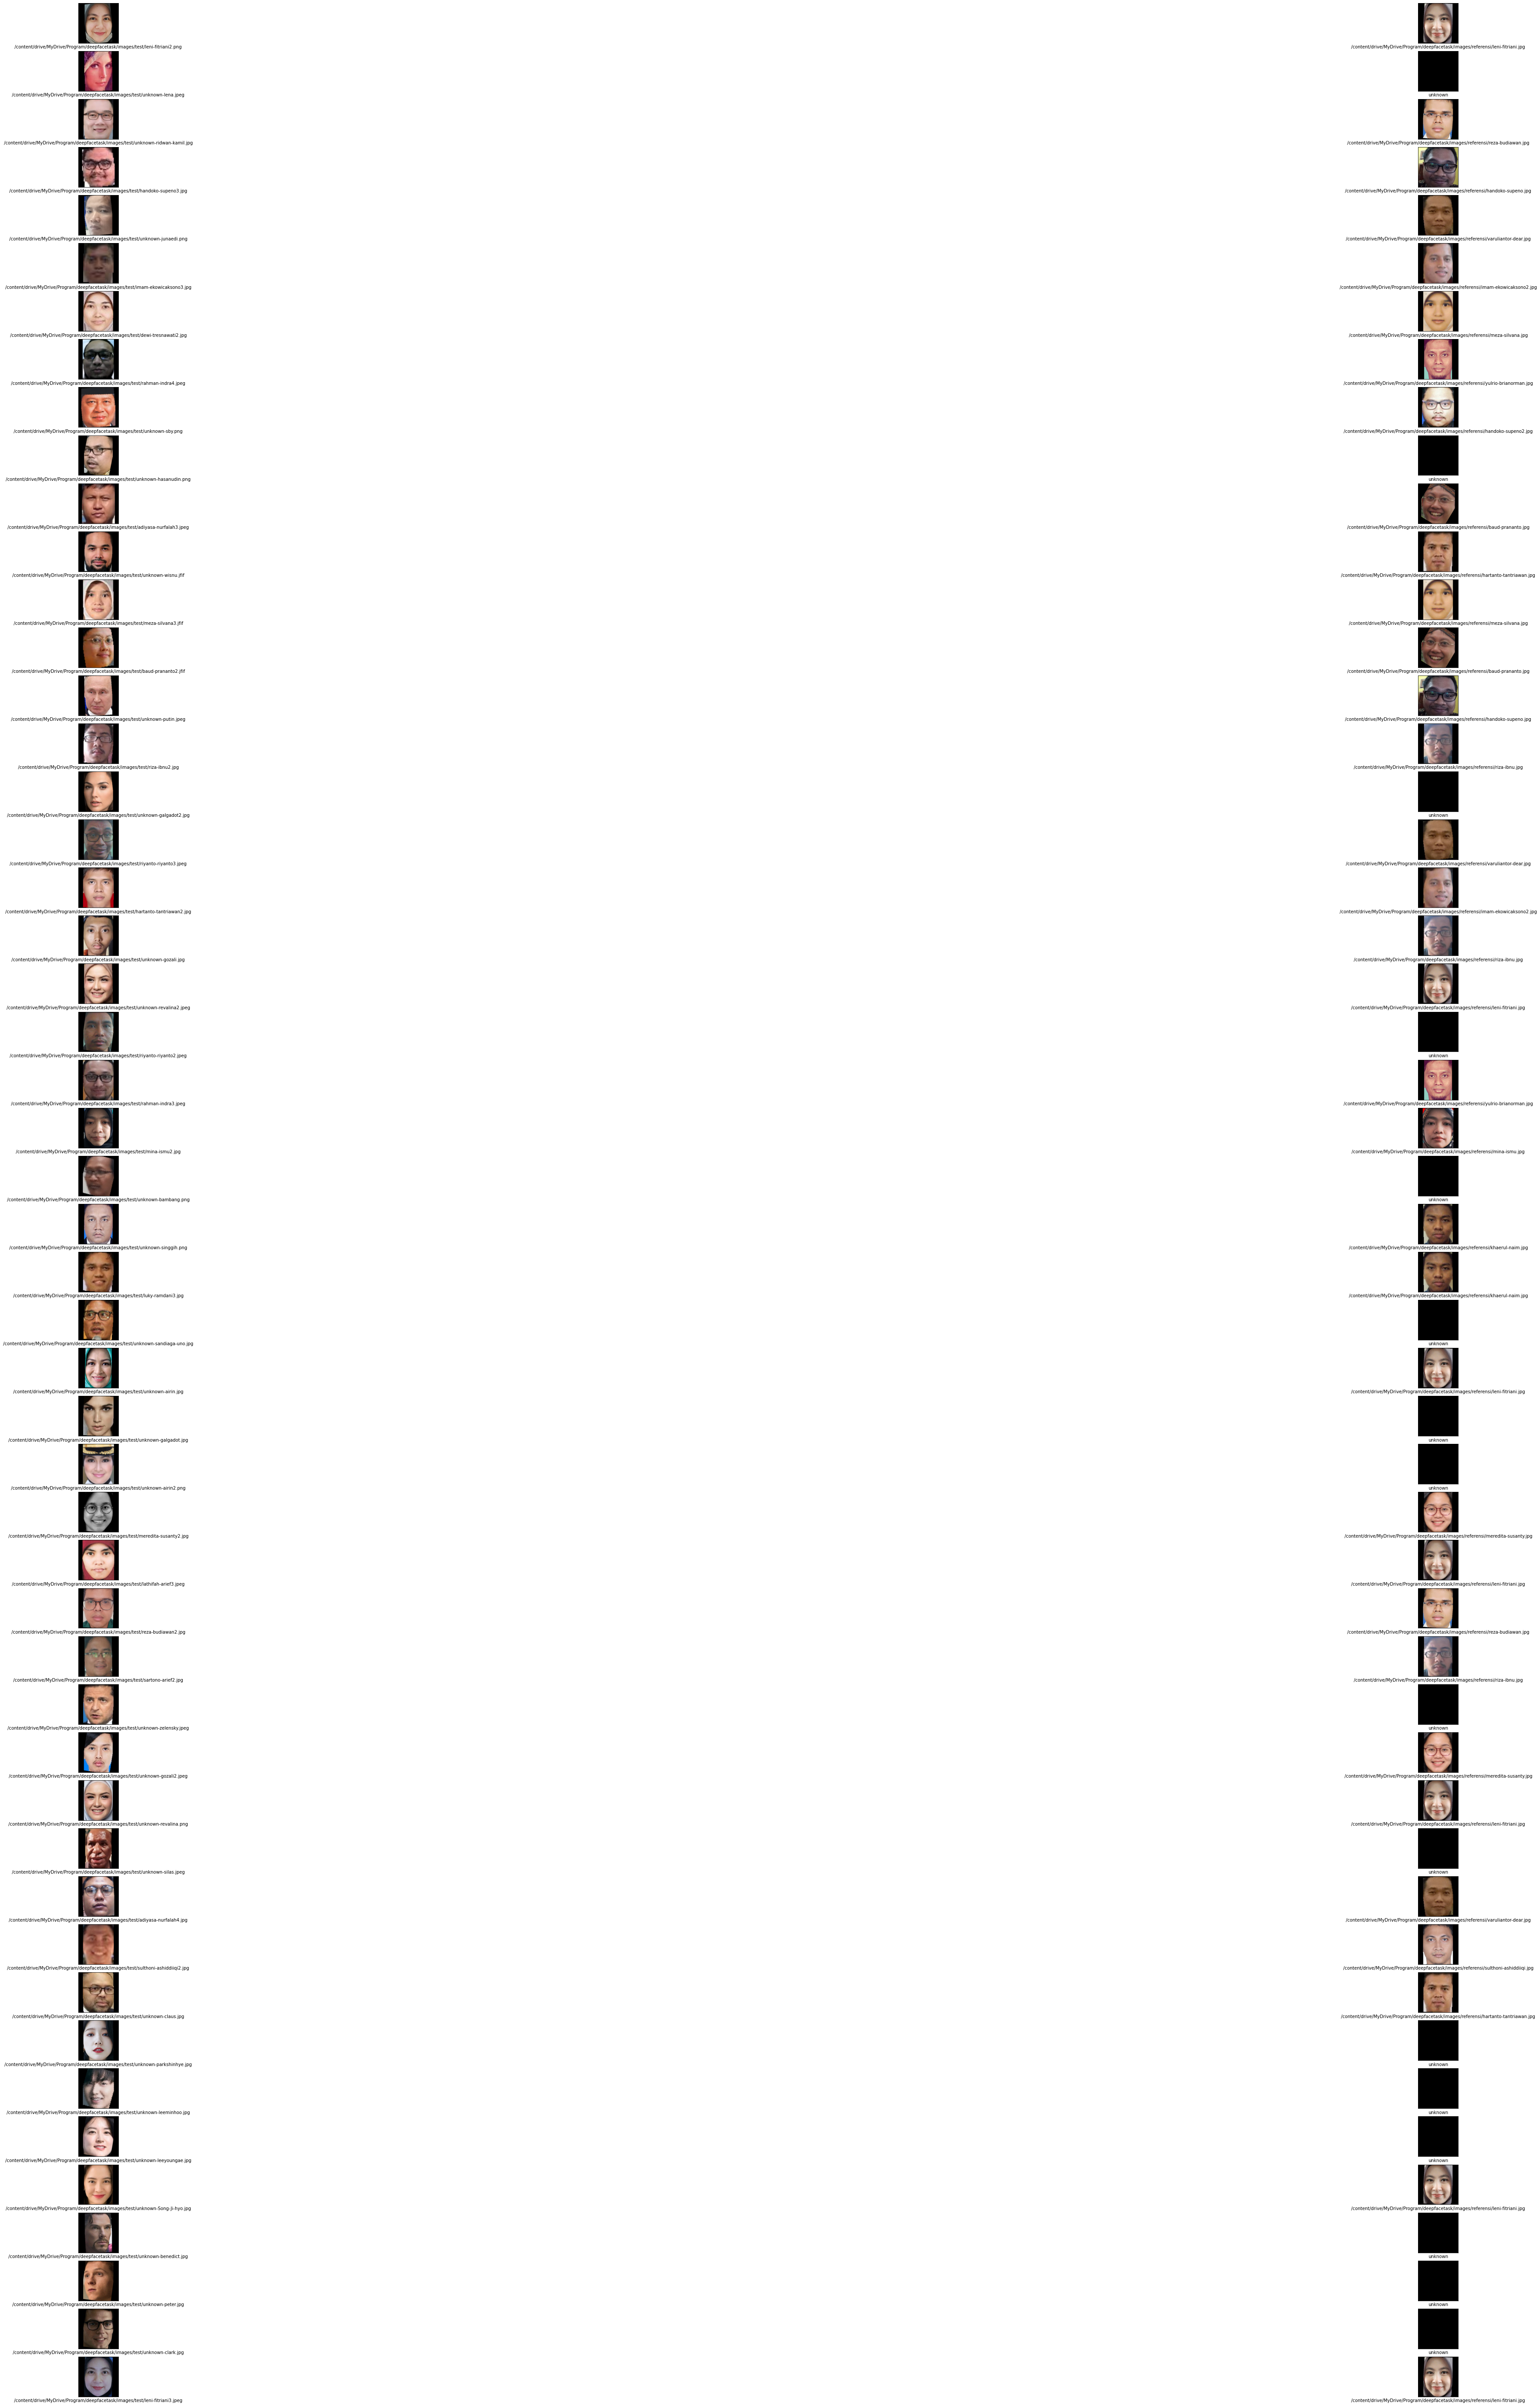

In [16]:
# show side by side test-ref
plt.figure(figsize=(100,100))
for i in range(len(img_paths)*2):
    plt.subplot(len(img_paths),2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if side_imgs[i]=="null":
      plt.imshow(np.zeros((100,100,3), np.uint8))
      plt.xlabel("unknown")
    else:
      plt.imshow(np.array(side_imgs[i]))
      plt.xlabel(side_paths[i])

In [17]:
# setting parameter
THRESHOLD = 0.55

# show distance, label, and result
correctness = 0
for i in range(len(img_paths)):
  test_filename = img_paths[i][len(test_folder_dir)+1:]
  arr_test_filename = test_filename.split('-')

  if len(np.array(results[i]))>0:
    res_img_path = np.array(results[i])[0][0]
    ref_filename = res_img_path[len(ref_folder_dir)+1:]
    arr_ref_filename = ref_filename.split('-')
    distance = np.array(results[i])[0][1]
  else:
    ref_filename = '-'
    distance = 1000
    arr_ref_filename = '-'
  
  if distance>THRESHOLD:
    label = 'unknown'
  else:
    label = arr_ref_filename[0]
  
  if label == arr_test_filename[0]:
    status = True
    correctness +=1
  else:
    status = False
  
  print('\n'+str(i+1)+
        '. '+test_filename+
        ', '+ref_filename+
        ', '+str(distance)+
        ', '+label+
        ', '+str(status))


1. leni-fitriani2.png, leni-fitriani.jpg, 0.04937585455329685, leni, True

2. unknown-lena.jpeg, -, 1000, unknown, True

3. unknown-ridwan-kamil.jpg, reza-budiawan.jpg, 0.05025922092301316, reza, False

4. handoko-supeno3.jpg, handoko-supeno.jpg, 0.06534715749206843, handoko, True

5. unknown-junaedi.png, varuliantor-dear.jpg, 0.06253803746649456, varuliantor, False

6. imam-ekowicaksono3.jpg, imam-ekowicaksono2.jpg, 0.05790257262035681, imam, True

7. dewi-tresnawati2.jpg, meza-silvana.jpg, 0.0667288182409993, meza, False

8. rahman-indra4.jpeg, yulrio-brianorman.jpg, 0.06282834486795186, yulrio, False

9. unknown-sby.png, handoko-supeno2.jpg, 0.06768375712723373, handoko, False

10. unknown-hasanudin.png, -, 1000, unknown, True

11. adiyasa-nurfalah3.jpeg, baud-prananto.jpg, 0.0534664400914201, baud, False

12. unknown-wisnu.jfif, hartanto-tantriawan.jpg, 0.04357755734332647, hartanto, False

13. meza-silvana3.jfif, meza-silvana.jpg, 0.027454313851224765, meza, True

14. baud-pranan

In [18]:
# print accuracy
accuracy = correctness/len(img_paths)*100
print('No. of test data = '+str(len(img_paths)))
print('No. of correct recognition = '+str(correctness))
print('Accuracy = '+str(accuracy)+' %')

No. of test data = 50
No. of correct recognition = 26
Accuracy = 52.0 %
